# Introduction to Time Series

## Indexing Data by Date

In [1]:
import pandas as pd
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)

##### A time series is a sequence of observations taken sequentially in time.

In [2]:
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
(bike_sharing_df.dteday.dtype, type(bike_sharing_df.dteday))

(dtype('O'), pandas.core.series.Series)

In [4]:
pd.to_datetime(bike_sharing_df.dteday).dtype

dtype('<M8[ns]')

In [5]:
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

In [6]:
bike_sharing_df.set_index('dteday', inplace=True) 
# use "dteday" as index, the name of the row, should be unique, doesn't have predictive power
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike_sharing_df.shape

(731, 14)

In [8]:
(bike_sharing_df.index.min(),
 bike_sharing_df.index.max())

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-31 00:00:00'))

In [9]:
bike_sharing_df['2011'].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.498630,0.0,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,677.402740,2728.358904,3405.761644
std,1.110946,0.0,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,556.269121,1060.110413,1378.753666
min,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,2.000000,0.0,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,222.000000,1730.000000,2132.000000
50%,3.000000,0.0,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,614.000000,2915.000000,3740.000000
75%,3.000000,0.0,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,871.000000,3632.000000,4586.000000
max,4.000000,0.0,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,3065.000000,4614.000000,6043.000000


In [10]:
bike_sharing_df['2012'].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.494536,1.0,6.513661,0.030055,2.986339,0.683060,1.368852,0.504081,0.481852,0.612166,0.189572,1018.483607,4581.450820,5599.934426
std,1.112185,0.0,3.455958,0.170971,2.006108,0.465921,0.516057,0.176112,0.156756,0.134206,0.078194,758.989897,1424.331846,1788.667868
min,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.254167,0.046650,2.000000,20.000000,22.000000
25%,2.000000,1.0,4.000000,0.000000,1.000000,0.000000,1.000000,0.347708,0.350685,0.508125,0.133721,429.750000,3730.500000,4369.000000
50%,2.500000,1.0,7.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.497779,0.611875,0.174750,904.500000,4776.500000,5927.000000
75%,3.000000,1.0,9.750000,0.000000,5.000000,1.000000,2.000000,0.653958,0.607646,0.711146,0.231196,1262.000000,5663.000000,7011.250000
max,4.000000,1.0,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.804913,0.925000,0.441563,3410.000000,6946.000000,8714.000000


In [11]:
bike_sharing_df['01/2011'].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,31.0,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.0,0.0,1.0,0.032258,2.935484,0.645161,1.483871,0.197707,0.204490,0.584366,0.195419,99.129032,1132.774194,1231.903226
std,0.0,0.0,0.0,0.179605,2.112431,0.486373,0.569852,0.062829,0.064107,0.133941,0.073817,72.503215,370.027540,372.432665
min,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.400000,0.073983,9.000000,416.000000,431.000000
25%,1.0,0.0,1.0,0.000000,1.000000,0.000000,1.000000,0.167046,0.161363,0.483333,0.146070,42.500000,885.500000,985.500000
50%,1.0,0.0,1.0,0.000000,3.000000,1.000000,1.000000,0.196522,0.208839,0.537826,0.186900,83.000000,1137.000000,1248.000000
75%,1.0,0.0,1.0,0.000000,5.000000,1.000000,2.000000,0.220489,0.233713,0.686932,0.247455,127.000000,1411.000000,1505.500000
max,1.0,0.0,1.0,1.000000,6.000000,1.000000,3.000000,0.363478,0.363625,0.862500,0.361950,331.000000,1844.000000,1985.000000


In [12]:
bike_sharing_df[bike_sharing_df.index > '03/2011'].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,671.000000,671.000000,671.000000,671.000000,671.00000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,2.630402,0.545455,6.968703,0.028316,3.00149,0.685544,1.394933,0.518360,0.495061,0.632873,0.188631,909.932936,3865.661699,4775.594635
std,1.061075,0.498301,3.240219,0.165998,2.00261,0.464645,0.546826,0.171398,0.151884,0.140703,0.076053,681.951397,1450.233381,1781.302249
min,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.107500,0.101658,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.00000,0.000000,1.000000,0.369166,0.366591,0.530000,0.134340,402.500000,2895.500000,3602.000000
50%,3.000000,1.000000,7.000000,0.000000,3.00000,1.000000,1.000000,0.530000,0.515133,0.634583,0.178496,763.000000,3803.000000,4679.000000
75%,4.000000,1.000000,10.000000,0.000000,5.00000,1.000000,2.000000,0.666667,0.618383,0.733750,0.231185,1178.500000,4901.500000,6161.000000
max,4.000000,1.000000,12.000000,1.000000,6.00000,1.000000,3.000000,0.861667,0.840896,0.972500,0.441563,3410.000000,6946.000000,8714.000000


In [13]:
bike_sharing_df['01/31/2011':'02/04/2011'].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,5.0,5.0,5.000000,5.0,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.0,0.0,1.800000,0.0,3.000000,1.0,1.800000,0.206254,0.216332,0.646355,0.182061,62.000000,1467.000000,1529.000000
std,0.0,0.0,0.447214,0.0,1.581139,0.0,0.447214,0.032136,0.032846,0.157528,0.094193,18.721645,109.364071,124.334227
min,1.0,0.0,1.000000,0.0,1.000000,1.0,1.000000,0.180833,0.177878,0.437826,0.053213,42.000000,1313.000000,1360.000000
25%,1.0,0.0,2.000000,0.0,2.000000,1.0,2.000000,0.186957,0.186250,0.585217,0.127839,47.000000,1454.000000,1501.000000
50%,1.0,0.0,2.000000,0.0,3.000000,1.0,2.000000,0.192174,0.228587,0.603750,0.187192,61.000000,1459.000000,1526.000000
75%,1.0,0.0,2.000000,0.0,4.000000,1.0,2.000000,0.211304,0.234530,0.775417,0.264308,72.000000,1489.000000,1550.000000
max,1.0,0.0,2.000000,0.0,5.000000,1.0,2.000000,0.260000,0.254417,0.829565,0.277752,88.000000,1620.000000,1708.000000


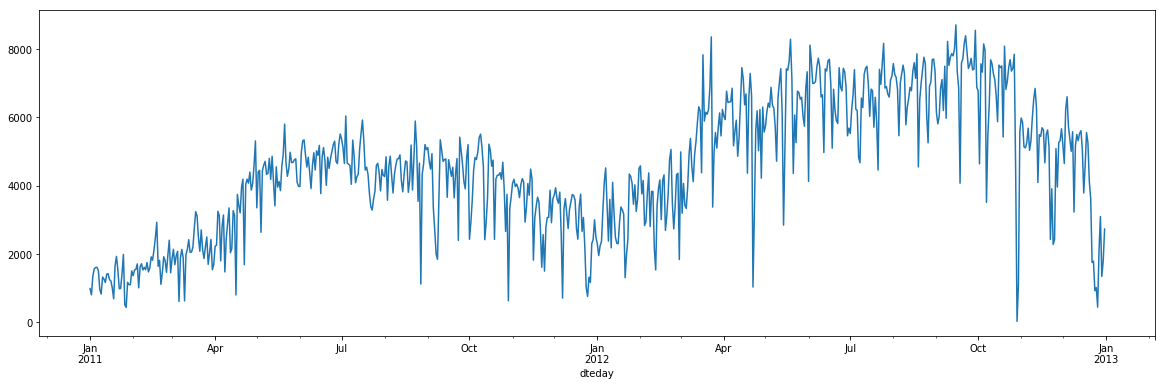

In [14]:
bike_sharing_df.cnt.plot(figsize=(20,6))

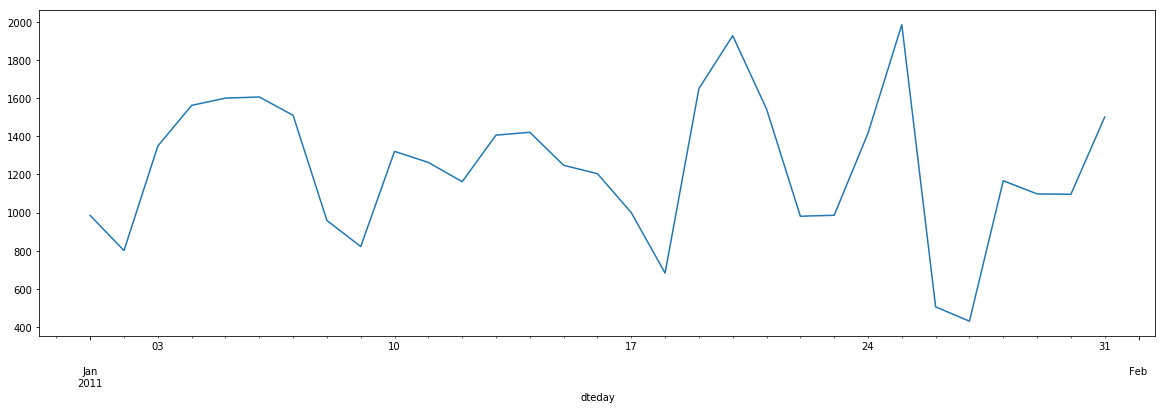

In [15]:
bike_sharing_df['01/2011'].cnt.plot(figsize=(20,6))

In [18]:
bike_sharing_df.groupby(by=[bike_sharing_df.index.year,
                            bike_sharing_df.index.weekday]).agg(['count',
                                                                 'min',
                                                                 'max'])

season            yr          mnth         holiday  ...   \
               count min max count min max count min max   count  ...    
dteday dteday                                                     ...    
2011   0          52   1   4    52   0   0    52   1  12      52  ...    
       1          52   1   4    52   0   0    52   1  12      52  ...    
       2          52   1   4    52   0   0    52   1  12      52  ...    
       3          52   1   4    52   0   0    52   1  12      52  ...    
       4          52   1   4    52   0   0    52   1  12      52  ...    
       5          53   1   4    53   0   0    53   1  12      53  ...    
       6          52   1   4    52   0   0    52   1  12      52  ...    
2012   0          53   1   4    53   1   1    53   1  12      53  ...    
       1          52   1   4    52   1   1    52   1  12      52  ...    
       2          52   1   4    52   1   1    52   1  12      52  ...    
       3          52   1   4    52   1   1    52   1  12      52  ...    
       4          52   1   4    52   1   1    52   1  12      52  ...    
       5          52   1   4    52   1   1    52   1  12      52  ...    
       6          53   1   4    53   1   1    53   1  12      53  ...    

              windspeed casual            registered               cnt        \
                    max  count  min   max      count   min   max count   min   
dteday dteday                                                                  
2011   0       0.417908     52   41  3065         52   883  4157    52  1000   
       1       0.388067     52    9  1281         52   674  4614    52   683   
       2       0.335825     52   25   949         52   472  4411    52   506   
       3       0.422275     52   15  1027         52   416  4488    52   431   
       4       0.353242     52   38  1318         52  1129  4414    52  1167   
       5       0.507463     53   57  2418         53   570  3647    53   627   
       6       0.361950     52   54  2521         52   451  3466    52   605   
2012   0       0.386821     53    2  2557         53    20  6435    53    22   
       1       0.365671     52   87  1348         52   573  6697    52  1013   
       2       0.415429     52    9  2562         52   432  6946    52   441   
       3       0.441563     52   74  1405         52  1470  6781    52  2114   
       4       0.414800     52  115  2469         52  2307  6917    52  3095   
       5       0.421642     52   67  3410         52  1182  5966    52  1301   
       6       0.409212     53   73  3283         53   907  5657    53  1027   

                     
                max  
dteday dteday        
2011   0       6043  
       1       5895  
       2       5225  
       3       5515  
       4       5538  
       5       5923  
       6       5511  
2012   0       7525  
       1       7767  
       2       8173  
       3       7804  
       4       8362  
       5       8714  
       6       8227  

[14 rows x 42 columns]